In [0]:
%sh
pip install tweepy demoji spacy langdetect fastquant yfinance
python -m spacy download en_core_web_lg

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=b7dcf28abd0d6360c2599101c65031bf437d909584eba5bf509d522adbcb31fa
  Stored in directory: /root/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=97034f0347ad1c589f138b851089abc0796f29ad67db990d27c8524c0d187dff
  Stored in directory: /root/.cache/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=c71507487cbaffc83e616d33f33ef017888f8a67858f209e6d45ce051b4ecc4c
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built bs4 multitasking langdetect
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Att

In [0]:
#import files and give access to tokens and keys
import tweepy,json, pandas as pd
access_token=#your access token
access_token_secret=#your secret access token
consumer_key=#your consumer key
consumer_secret=#your consumer secret key
auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

Using Tweepy's API

In [0]:
# create pandas dataframe
twitter_mentions = pd.DataFrame(columns = ['Time', 'Tweet'])

In [0]:
# authenticate code, set api to sleep if the rate limit for api calls is reached, wait til next 15 minute window to resume api calls
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret, access_token, access_token_secret
)
api = tweepy.API(auth, wait_on_rate_limit=True)


# opting to exclude user ID from the dataframe as it's not super relevant, but the option for the code is below
#twitter_mentions = pd.DataFrame(columns = ['Time', 'User', 'Tweet'])
#for tweet in tweepy.Cursor(api.search_tweets, "Ethereum", count=100).items():
#    twitter_mentions = twitter_mentions.append({'Time': tweet.created_at, 'User': tweet.user, 'Tweet': tweet.text}, ignore_index=True)


# collecting data. If printing done it's complete, however if short on time just cancel the execution
for tweet in tweepy.Cursor(api.search_tweets, "Ethereum", count=100).items():
    twitter_mentions = twitter_mentions.append({'Time': tweet.created_at, 'Tweet': tweet.text}, ignore_index=True)

print("Done")
#print(twitter_mentions)

Rate limit reached. Sleeping for: 100
Rate limit reached. Sleeping for: 769
Rate limit reached. Sleeping for: 766
Rate limit reached. Sleeping for: 744
Rate limit reached. Sleeping for: 743
Rate limit reached. Sleeping for: 737
Rate limit reached. Sleeping for: 730
Rate limit reached. Sleeping for: 710
Rate limit reached. Sleeping for: 693
Rate limit reached. Sleeping for: 658
Rate limit reached. Sleeping for: 628
Rate limit reached. Sleeping for: 599


---------------------------------------------------------------------------
ConnectionResetError                      Traceback (most recent call last)
/databricks/python/lib/python3.8/site-packages/urllib3/connectionpool.py in urlopen(self, method, url, body, headers, retries, redirect, assert_same_host, timeout, pool_timeout, release_conn, chunked, body_pos, **response_kw)
    669             # Make the request on the httplib connection object.
--> 670             httplib_response = self._make_request(
    671                 conn,

/databricks/python/lib/python3.8/site-packages/urllib3/connectionpool.py in _make_request(self, conn, method, url, timeout, chunked, **httplib_request_kw)
    425                     # Otherwise it looks like a bug in the code.
--> 426                     six.raise_from(e, None)
    427         except (SocketTimeout, BaseSSLError, SocketError) as e:

/databricks/python/lib/python3.8/site-packages/urllib3/packages/six.py in raise_from(value, from_value)

/

In [0]:
#checking out the size of the dataset
twitter_mentions.shape

Out[6]: (197411, 2)

In [0]:
#look at first 5 rows (hope for no profanity)
twitter_mentions.head()

,Time,Tweet
0,2022-04-30 14:25:50+00:00,🔥 Today's #SolanaMints 🔥\n\n✅@Atlaria\n✅@Eizpe...
1,2022-04-30 14:25:50+00:00,Ultra Stellar USDC Chain Swap Tool to/and from...
2,2022-04-30 14:25:49+00:00,RT @quant_network: We're hiring at Quant! We'r...
3,2022-04-30 14:25:47+00:00,"RT @Leerzeit: ""Something is wrotten in the sta..."
4,2022-04-30 14:25:47+00:00,RT @Phemex_official: Explore Phemex Universe🌍 ...


In [0]:
from pyspark.sql import SparkSession
  
# Building the SparkSession and name 
# it :'pandas to spark'
spark = SparkSession.builder.appName(
  "pandas to spark").getOrCreate()

spark.conf.set("spark.sql.execution.arrow.enabled", "true")
  
# Creating the DataFrame
spark_write = spark.createDataFrame(twitter_mentions)
  
# Show the DataFrame
spark_write.show()

+-------------------+--------------------+
|               Time|               Tweet|
+-------------------+--------------------+
|2022-04-30 14:25:50|🔥 Today's #Solan...|
|2022-04-30 14:25:50|Ultra Stellar USD...|
|2022-04-30 14:25:49|RT @quant_network...|
|2022-04-30 14:25:47|RT @Leerzeit: "So...|
|2022-04-30 14:25:47|RT @Phemex_offici...|
|2022-04-30 14:25:46|I am happy to joi...|
|2022-04-30 14:25:46|RT @creazzione: @...|
|2022-04-30 14:25:45|@ddmnft16 Crypto ...|
|2022-04-30 14:25:44|RT @iggzhu: Unexp...|
|2022-04-30 14:25:42|RT @Phemex_offici...|
|2022-04-30 14:25:42|@CanselMustafa  D...|
|2022-04-30 14:25:41|#ethaxcrypto #eth...|
|2022-04-30 14:25:41|reddit 🤖: Can an...|
|2022-04-30 14:25:41|I think this one ...|
|2022-04-30 14:25:40|RT @flufzilla: wa...|
|2022-04-30 14:25:39|RT @Satoshii_BTCs...|
|2022-04-30 14:25:38|#BTC #doge #twitt...|
|2022-04-30 14:25:37|I've just created...|
|2022-04-30 14:25:37|Breaking: Fei Pro...|
|2022-04-30 14:25:36|RT @decryptmedia:...|
+------------

In [0]:
# Save to DBFS as a csv
spark_write\
.coalesce(1)\
.write\
.format("csv")\
.mode("overwrite")\
.save("/FileStore/tables/twitter_mentions-csv")

In [0]:
# Display
spark_write.display()

Time,Tweet
2022-04-30T14:25:50.000+0000,🔥 Today's #SolanaMints 🔥 ✅@Atlaria ✅@EizperChain ✅@GangsofNewPork2 ✅@RugDegen ✅@MgFootballSol ✅@BearsInfamous ✅… https://t.co/eB854CncO9
2022-04-30T14:25:50.000+0000,Ultra Stellar USDC Chain Swap Tool to/and from Ethereum/Stellar @BottomsUpBritch @samconnerone https://t.co/YK1c0vN1kB
2022-04-30T14:25:49.000+0000,"RT @quant_network: We're hiring at Quant! We're looking for a talented Senior Ethereum Developer for a 6-month contract in London, Dublin o…"
2022-04-30T14:25:47.000+0000,"RT @Leerzeit: ""Something is wrotten in the state of ethereum."" https://t.co/CUOQkCBLQ6"
2022-04-30T14:25:47.000+0000,"RT @Phemex_official: Explore Phemex Universe🌍 and visit planet Bitcoin, Ethereum, Sand, and Doge 🤩 to collect your very own Citizen Phemex…"
2022-04-30T14:25:46.000+0000,I am happy to join this legit program this Ethax project go rock soon in future because this is the best project.… https://t.co/gTB8RUzE6O
2022-04-30T14:25:46.000+0000,RT @creazzione: @_NftCollectors @cybotz_nft #nftart Just the next 7 seven days - ON SALE! ❤️ @opensea ❤️ some of my favorite #NFTphoto from…
2022-04-30T14:25:45.000+0000,@ddmnft16 Crypto never sleeps. https://t.co/nwmiR9gsLT #EthereumNFTs #NFTCommunity #nftcollector #NFT #opensea… https://t.co/U7VFhuWfdv
2022-04-30T14:25:44.000+0000,RT @iggzhu: Unexpected Surprise 🔥🔥🔥#Ethereum 0.0061($17.25) 3⃣2⃣1⃣follow@iggzhu #horse #horsegirl #ethereumNFT #NFTCommunity #NFTGiveaway…
2022-04-30T14:25:42.000+0000,"RT @Phemex_official: Explore Phemex Universe🌍 and visit planet Bitcoin, Ethereum, Sand, and Doge 🤩 to collect your very own Citizen Phemex…"


In [0]:
# Converting Raw data into number of tweets per 15 minutes
mentions15 = twitter_mentions.set_index('Time').resample('900S').count()
mentions15.head()

,Tweet
Time,
2022-04-28 09:30:00+00:00,681
2022-04-28 09:45:00+00:00,866
2022-04-28 10:00:00+00:00,1068
2022-04-28 10:15:00+00:00,1541
2022-04-28 10:30:00+00:00,1461


In [0]:
# Getting start and end time from twitter dataset
start = mentions15.index.min().strftime("%Y-%m-%d %H:%M:%S")
end = mentions15.index.max().strftime("%Y-%m-%d %H:%M:%S")
#start = '2022-04-01'
#end = '2022-04-22'
print(start)
print(end)

2022-04-28 09:30:00
2022-04-30 14:15:00


In [0]:
import fastquant as fq
from datetime import datetime

# Get price of bitcoin during timeframe
btc = fq.get_crypto_data('BTC/USDT', start, end, time_resolution = '15m')
btc.tail()

,open,high,low,close,volume
dt,,,,,
2022-04-30 13:15:00,38607.89,38638.24,38600.09,38610.01,188.13725
2022-04-30 13:30:00,38610.02,38628.43,38501.65,38517.89,585.69151
2022-04-30 13:45:00,38517.89,38541.84,38501.00,38506.33,229.47378
2022-04-30 14:00:00,38506.32,38638.38,38410.34,38528.67,1496.71426
2022-04-30 14:15:00,38528.67,38528.68,38323.59,38394.46,1524.52170


In [0]:
#Get price of Ethereum during time frame
eth = fq.get_crypto_data('ETH/USDT', start, end, time_resolution = '15m')
eth.tail()

,open,high,low,close,volume
dt,,,,,
2022-04-30 13:15:00,2827.81,2830.49,2826.19,2826.20,1478.9315
2022-04-30 13:30:00,2826.20,2828.00,2813.90,2817.68,4546.6046
2022-04-30 13:45:00,2817.67,2822.85,2817.45,2821.05,2631.8851
2022-04-30 14:00:00,2821.06,2824.80,2811.00,2814.73,7790.2592
2022-04-30 14:15:00,2814.73,2814.73,2794.26,2805.00,8934.3740


In [0]:
# Checking to see if our dataframes are the same size
print(eth.shape)
print(btc.shape)
print(mentions15.shape)

(212, 5)
(212, 5)
(212, 1)


Out[83]: <AxesSubplot:xlabel='Time'>

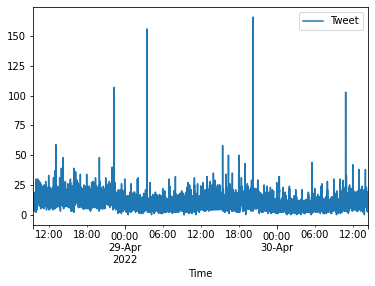

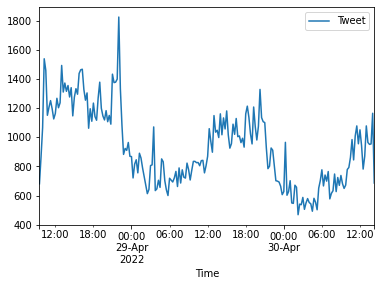

In [0]:
# SHowing Graphs of twitter data grouped by 10 second windows and by 15 minute windows - much easier to read the 15 minute one, hence why we aren't more granular
twitter_mentions.set_index('Time').resample('10S').count().plot()
mentions15.plot()

Out[84]: <AxesSubplot:xlabel='dt'>

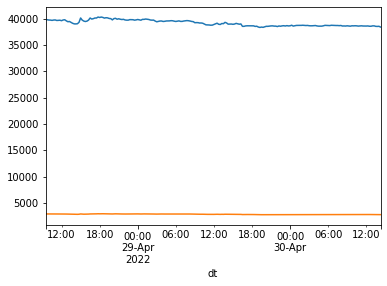

In [0]:
import matplotlib as plt

# Quick check on the graphs - bitcoin is significantly higher than ethereum, so lets change that
btc['close'].plot()
eth['close'].plot()


Out[91]: <matplotlib.legend.Legend at 0x7fab1ad7ea30>

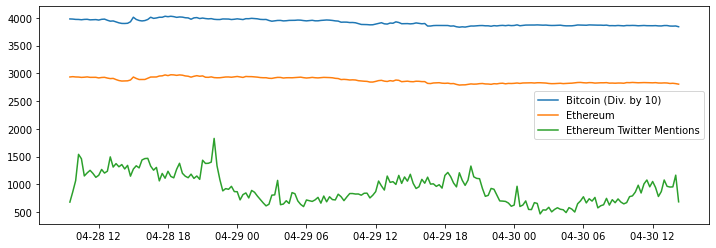

In [0]:
import matplotlib.pyplot as plt

# Putting it all together to see
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(btc.index, btc['close'].div(10), label = "Bitcoin (Div. by 10)")
plt.plot(eth.index, eth['close'], label = "Ethereum")
plt.plot(mentions15.index, mentions15['Tweet'], label = "Ethereum Twitter Mentions")
plt.legend()

Analysis

In [0]:
# Pearson Correlation
import scipy.stats as stats

c, p = stats.pearsonr(btc.dropna()['close'], eth.dropna()['close'])
print(f"Eth vs Btc Pearson Correlation: {c}\n")

c, p = stats.pearsonr(mentions15.dropna()['Tweet'], eth.dropna()['close'])
print(f"Eth vs Eth Twitter Mentions Pearson Correlation: {c}\n")

c, p = stats.pearsonr(mentions15.dropna()['Tweet'], btc.dropna()['close'])
print(f"Btc vs Eth Twitter Mentions Pearson Correlation: {c}\n")


Eth vs Btc Pearson Correlation: 0.9863205841128134

Eth vs Eth Twitter Mentions Pearson Correlation: 0.34656742653258527

Btc vs Eth Twitter Mentions Pearson Correlation: 0.392885323280153



In [0]:
# Normalized Cross Correlation
# source: https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html
import math
eth_btc = sum(btc['close']*eth['close'])/ math.sqrt(sum(btc['close']**2)*sum(eth['close']**2))

# Dropping index to calculate the others as I get TypeError: Cannot join tz-naive with tz-aware DatetimeIndex if not
eth_twt = sum(mentions15['Tweet'].reset_index(drop=True)*eth['close'].reset_index(drop=True))/ math.sqrt(sum(mentions15['Tweet']**2)*sum(eth['close']**2))
btc_twt = sum(mentions15['Tweet'].reset_index(drop=True)*btc['close'].reset_index(drop=True))/ math.sqrt(sum(mentions15['Tweet']**2)*sum(btc['close']**2))

print("The normalized cross correlation value between ethereum and bitcoin: " + str(eth_btc))
print("The normalized cross correlation value between ethereum and twitter mentions of ethereum: " + str(eth_twt))
print("The normalized cross correlation value between twitter mentions of ethereum and bitcoin: " + str(btc_twt))

The normalized cross correlation value between ethereum and bitcoin: 0.999988485428827
The normalized cross correlation value between ethereum and twitter mentions of ethereum: 0.9642628607847307
The normalized cross correlation value between twitter mentions of ethereum and bitcoin: 0.9641231543779144


In [0]:
# VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
granger = pd.concat([btc['close'], eth['close']], axis =1 , keys = ['BTC', 'ETH'])

# Granger Causality w/ lags 1-8
granger_results = grangercausalitytests(granger, 8)

# Granger Causality w/ lag = 8
#granger_results = grangercausalitytests(granger, [8])


print(adfuller(btc['close'], autolag = 'AIC'))
print(adfuller(eth['close'], autolag = 'AIC'))
print(adfuller(mentions15['Tweet'], autolag = 'AIC'))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2636  , p=0.6082  , df_denom=208, df_num=1
ssr based chi2 test:   chi2=0.2674  , p=0.6051  , df=1
likelihood ratio test: chi2=0.2673  , p=0.6052  , df=1
parameter F test:         F=0.2636  , p=0.6082  , df_denom=208, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1913  , p=0.8260  , df_denom=205, df_num=2
ssr based chi2 test:   chi2=0.3920  , p=0.8220  , df=2
likelihood ratio test: chi2=0.3916  , p=0.8222  , df=2
parameter F test:         F=0.1913  , p=0.8260  , df_denom=205, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4108  , p=0.7454  , df_denom=202, df_num=3
ssr based chi2 test:   chi2=1.2752  , p=0.7350  , df=3
likelihood ratio test: chi2=1.2713  , p=0.7360  , df=3
parameter F test:         F=0.4108  , p=0.7454  , df_denom=202, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4439  , p=0.7768  

In [0]:
# VAR/ Granger Causality
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

# Creating new dataframes to run Granger Causality tests
grangerethtwt = pd.concat([eth['close'].reset_index(drop=True), mentions15['Tweet'].reset_index(drop=True)], axis =1 , keys = ['ETH', "TWTR"])

grangerbtctwt = pd.concat([btc['close'].reset_index(drop=True),mentions15['Tweet'].reset_index(drop=True)], axis =1 , keys = ['BTC', "TWTR"])

grangerethbtc = pd.concat([btc['close'], eth['close']], axis =1 , keys = ['BTC', 'ETH'])

# Running dickey fuller test to see the correct # of lags to use - lets roll with 5
print(adfuller(btc['close'], autolag = 'AIC'))
print(adfuller(eth['close'], autolag = 'AIC'))
print(adfuller(mentions15['Tweet'], autolag = 'AIC'))

# Granger Causality w/ lags 1-8
#granger_results = grangercausalitytests(grangerethtwt, 8)

# Granger Causality w/ lag = 5
grangergrangerethtwt_results = grangercausalitytests(grangerethtwt, [5])
grangergrangerbtctwt_results = grangercausalitytests(grangerbtctwt, [5])
grangergrangerethbtc_results = grangercausalitytests(grangerethbtc, [5])


(-0.9026044186449282, 0.787113535276111, 4, 207, {'1%': -3.4623415245233145, '5%': -2.875606128263243, '10%': -2.574267439846904}, 2417.7038857773423)
(-1.027758496272447, 0.7430058910544719, 5, 206, {'1%': -3.4624988216864776, '5%': -2.8756749365852587, '10%': -2.5743041549627677}, 1430.6029873733282)
(-1.9851211523364114, 0.29313481829945637, 5, 206, {'1%': -3.4624988216864776, '5%': -2.8756749365852587, '10%': -2.5743041549627677}, 2429.3748578038294)

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.5198  , p=0.7611  , df_denom=196, df_num=5
ssr based chi2 test:   chi2=2.7448  , p=0.7393  , df=5
likelihood ratio test: chi2=2.7268  , p=0.7420  , df=5
parameter F test:         F=0.5198  , p=0.7611  , df_denom=196, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.5529  , p=0.7360  , df_denom=196, df_num=5
ssr based chi2 test:   chi2=2.9197  , p=0.7124  , df=5
likelihood ratio test: chi2=2.8993  , p=0.7155  , df=5
parameter 

Future Work: Streaming live data with Tweepy Stream

In [0]:
from tweepy import Stream

# https://github.com/tweepy/tweepy/blob/master/tweepy/streaming.py#L258

class MyStreamListener(Stream):
   
    def on_status(self, status):
      #somehow need to add data to data set rather than print
      # also need way to stop stream. Some articles sugguest a try: stream except: keyboardinterrupt, but cannot do that in databricks
        print(status.text,status.created_at)# prints every tweet received
    
    def on_error(self, status_code):
        if status_code == 420:  # end of monthly limit rate 
            return False


stream = MyStreamListener(consumer_key,
                          consumer_secret,
                          access_token,
                          access_token_secret,)

stream.filter(track=["Ethereum"], languages=["en"])


RT @ObieNotDobo: I love this Gorilla on the wall. Planning an NFTs collection?

WDYT @Coinbase_NFT ?

#NFTs #coinbasenft #Ethereum #Etherea… 2022-04-23 23:31:51+00:00
RT @HangoutMeta: 🚀600 Whitelist Spots Available for Hangout Ethereum Flatland Round 1 Details
https://t.co/9F8C9mPRuf

🚨️In case you didn't… 2022-04-23 23:31:52+00:00
#Bitcoin Last Price $39784 #BTC 🚀
Daily Indicators:
RSI: 41.0
MA(20): 41537
MA(50): 41995
MA(200): 47909
Bollinger… https://t.co/CNERuaq7OM 2022-04-23 23:31:53+00:00
@PandoraNFT_ Hello my dear friend
Please support my work.
Thanks
https://t.co/zOP6oyTGGc 2022-04-23 23:31:53+00:00
RT @doyifting: $10 || 140.000 IDR || GCASH

– RT + RT Like ⬇️ 

Ends morning! 2022-04-23 23:31:53+00:00
RT @GamblinMfers: Over 80% of the proceeds going back to the community. Help us get the word out so we can change a #mfers life. #MfersUnit… 2022-04-23 23:31:54+00:00
RT @OGrymaylo: #RisingSunCoin means rewards galore!

🌟5% ETH Rewards
🌟Referral Program
🌟Staking Soon

TG: https://

Future Work: Incorporate Stock Data

[*********************100%***********************]  1 of 1 completed
Out[126]: <AxesSubplot:xlabel='Datetime'>

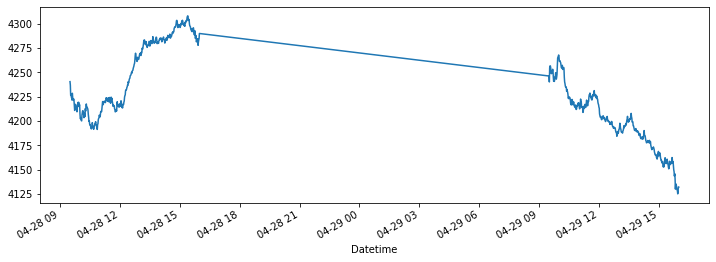

In [0]:
import yfinance as yf
#stocks = fq.get_stock_data('^GSPC', start, TODAY_ymd)
start = mentions15.index.min().strftime("%Y-%m-%d")
end = mentions15.index.max().strftime("%Y-%m-%d")
stocks = yf.download('^GSPC', start, end, interval = '1m')
#stocks
stocks['Close'].plot()

In [0]:
#stocks.index = pd.to_datetime(stocks.index, format='%Y-%m-%d %H:%M:%S')
#stocks.loc[pd.to_datetime(mentions1.index.max().strftime("%Y-%m-%d %H:%M:%S"), format = '%Y-%m-%d %H:%M:%S')] = [0,0,0,0,0,0]
#stocks = stocks.set_index(stocks.index).sort_index().resample('Min').ffill()
#stocks['Close'].plot()

---------------------------------------------------------------------------
TypeError Traceback (most recent call last)
 in 
 1 stocks.index = pd.to_datetime(stocks.index, format='%Y-%m-%d %H:%M:%S')
 2 stocks.loc[pd.to_datetime(mentions1.index.max().strftime("%Y-%m-%d %H:%M:%S"), format = '%Y-%m-%d %H:%M:%S')] = [0,0,0,0,0,0]
----> 3 stocks = stocks.set_index(stocks.index).resample('Min').ffill()
 4 stocks['Close'].plot()

/databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in resample(self, rule, axis, closed, label, convention, kind, loffset, base, on, level, origin, offset)
 8081 
 8082 axis = self._get_axis_number(axis)
-> 8083 return get_resampler(
 8084 self,
 8085 freq=rule,

/databricks/python/lib/python3.8/site-packages/pandas/core/resample.py in get_resampler(obj, kind, **kwds)
 1268 """
 1269 tg = TimeGrouper(**kwds)
-> 1270 return tg._get_resampler(obj, kind=kind)
 1271 
 1272 

/databricks/python/lib/python3.8/site-packages/pandas/core/resample.py in _get_resampler(self, obj, kind)
 1423 
 1424 """
-> 1425 self._set_grouper(obj)
 1426 
 1427 ax = self.ax

/databricks/python/lib/python3.8/site-packages/pandas/core/groupby/grouper.py in _set_grouper(self, obj, sort)
 363 if (self.sort or sort) and not ax.is_monotonic:
 364 # use stable sort to support first, last, nth
--> 365 indexer = self.indexer = ax.argsort(kind="mergesort")
 366 ax = ax.take(indexer)
 367 obj = obj.take(indexer, axis=self.axis)

/databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in argsort(self, *args, **kwargs)
 4570 result = np.array(self)
 4571 
-> 4572 return result.argsort(*args, **kwargs)
 4573 
 4574 def get_value(self, series: "Series", key):

pandas/_libs/tslibs/timestamps.pyx in pandas._libs.tslibs.timestamps._Timestamp.__richcmp__()

pandas/_libs/tslibs/timestamps.pyx in pandas._libs.tslibs.timestamps._Timestamp._assert_tzawareness_compat()

TypeError: Cannot compare tz-naive and tz-aware timestamps